In [1]:
%matplotlib inline

# Contents
* rand(), empty(), zeros(), tensor(), new_ones(), rand_like(), size()
* [100 operations:](https://pytorch.org/docs/stable/torch.html)
* Torch <=> Numpy
* CUDA *not yet tested
* Autograd
* Gradients
* Neural Net design
* Loss Functions
* Backprop
* Updating Weights
* Training a Classifier:
    * Load & normalize CIFAR10 training, test
    * Design a CNN
    * Design a loss function & optimizer
    * Train
    * Test
* Testing
* Training on GPUs * not yet tested
* Optional: Data Parallelism

## What is Pytorch?
* rand(), empty(), zeros(), tensor(), new_ones(), rand_like(), size()

In [2]:
from __future__ import print_function
import torch

x = torch.rand(5, 3) # randomly initialized 5x3 tensor.
print(x)

tensor([[0.2719, 0.9809, 0.8674],
        [0.8569, 0.4938, 0.7317],
        [0.0993, 0.0480, 0.0143],
        [0.7832, 0.9375, 0.3843],
        [0.7222, 0.6466, 0.4846]])


In [3]:
x = torch.empty(5,3) # uninitialized tensor
print(x)

tensor([[3.1031e-12, 4.5857e-41, 3.1031e-12],
        [4.5857e-41, 4.4842e-44, 0.0000e+00],
        [1.5695e-43, 0.0000e+00, 3.6809e-36],
        [0.0000e+00, 1.8474e+20, 6.8906e+22],
        [2.5176e-12, 1.4586e-19, 1.4917e-07]])


In [4]:
x = torch.zeros(5,3, dtype=torch.long) # 5x3 zeros, dtype long
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([5.5,3]) # create from constant data
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = x.new_ones(5,3,dtype=torch.double) # create from exisiting tensor
print(x)                               # new_* methods accept sizes

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [7]:
x = torch.randn_like(x, dtype=torch.float) # overrides data type
print(x)

tensor([[ 0.3164,  0.6417, -0.7297],
        [ 1.1739,  1.6115,  1.0984],
        [ 1.9360, -0.2025, -0.0628],
        [ 0.4107,  0.8648,  0.2449],
        [-1.0419,  0.6944, -0.7021]])


In [8]:
print(x.size())

torch.Size([5, 3])


### Operations

In [9]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.4352,  1.5889, -0.5450],
        [ 1.5839,  1.7729,  1.8877],
        [ 2.8425,  0.4335,  0.4658],
        [ 0.8045,  1.7304,  0.5125],
        [-0.2101,  1.5612, -0.0641]])


In [10]:
print(torch.add(x,y)) # alternative syntax

tensor([[ 0.4352,  1.5889, -0.5450],
        [ 1.5839,  1.7729,  1.8877],
        [ 2.8425,  0.4335,  0.4658],
        [ 0.8045,  1.7304,  0.5125],
        [-0.2101,  1.5612, -0.0641]])


In [11]:
result = torch.empty(5,3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.4352,  1.5889, -0.5450],
        [ 1.5839,  1.7729,  1.8877],
        [ 2.8425,  0.4335,  0.4658],
        [ 0.8045,  1.7304,  0.5125],
        [-0.2101,  1.5612, -0.0641]])


In [12]:
y.add_(x) # in-place addition.
          # post-fix underscore signifies in-place mutation.

tensor([[ 0.4352,  1.5889, -0.5450],
        [ 1.5839,  1.7729,  1.8877],
        [ 2.8425,  0.4335,  0.4658],
        [ 0.8045,  1.7304,  0.5125],
        [-0.2101,  1.5612, -0.0641]])

In [13]:
print(x[:,1]) # numpy-like indexing

tensor([ 0.6417,  1.6115, -0.2025,  0.8648,  0.6944])


In [14]:
# re-sizing & re-shaping tensors
x = torch.rand(4,4)
y = x.view(16)
z = x.view(-1,8) # size -1 is inferred from other dimensions

print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [15]:
# one-element tensors: use item() to get Python numeric value
x = torch.randn(1)
print(x, x.item())

tensor([-0.7101]) -0.7100942730903625


### [100+ tensor operations, described here](https://pytorch.org/docs/torch)

### Torch Tensors <==> Numpy Arrays
* They share underlying memory locations (if Torch Tensor is on CPU).
* All tensors on CPU support conversion to NumPy & back -- except CharTensor.

In [16]:
a = torch.ones(5); print(a)
b = a.numpy(); print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [17]:
a.add_(1); print(a); print(b) # notice how b changes too

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [18]:
import numpy as np # convert numpy array to torch tensor

a = np.ones(5); b = torch.from_numpy(a)

np.add(a, 1, out=a)
print(a), print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


(None, None)

### CUDA Tensors

In [19]:
# run cell only if CUDA is available.

if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device) # create on GPU
    x = x.to(device) # move to GPU
    z = x+y
    print(z)
    print(z.to("cpu", torch.double))

## [Autograd](https://pytorch.org/docs/stable/autograd.html#function): automatic differentiation

* _torch.Tensor_ is the central point. 
* Tensors will automatically track all operations on it if __.requires_grad__ is set to __True__.
* Gradients are store in __.grad__.
* Use __.detach()__ to stop tracking history on a tensor.
* Use __torch.no_grad()__ to prevent tracking history.

* __Tensors__ & __Functions__ = interconnected; forms acyclic graphs with computational history. Each tensor has a .grad_fn that references a tensor's creator function.

* Calling __.backward__ on a Tensor computes its derivatives.

* if Tensor = scalar, no args needed for __.backward__.
* if Tensor = >1 element, needs a _gradient_ arg = Tensor of matching shape.

In [20]:
import torch

In [21]:
# track computation on this new tensor
x = torch.ones(2,2, requires_grad=True); print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [22]:
# basic tensor ops
y = x+2; print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [23]:
# y was created due to an op - so it has a grad_fn.
print(y.grad_fn)

In [24]:
z = y*y*3; out = z.mean() # do some more ops on y:
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [25]:
# .requires_grad_(...) changes Tensor's requires_flag in-place.
# default = False

a = torch.randn(2,2); a = ((a*3) / (a-1))
print(a)
print(a.requires_grad)

tensor([[-18.3443,   6.1879],
        [  1.1414,  -3.3800]])
False


In [26]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [27]:
b = (a*a).sum()
print(b.grad_fn)

### Gradients
* if out contains one scalar, out.backward() is equivalent
* to out.backward(torch.tensor(1.))

In [28]:
print(out)

tensor(27., grad_fn=<MeanBackward0>)


In [29]:
out.backward()

In [30]:
print(x.grad) # gradient = d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


* math: if you have vector-valued function ~y, gradient of ~y w.r.t. ~x  is a __Jacobian matrix__(J).
* _torch.autograd_ = engine for computing vector-Jacobian products.
* given v = (v1,v2,..vm)^T, then by chain rule:
    - vector-Jacobian product = gradient of i w.r.t. ~x.


In [31]:
# example of a vector-Jacobian product
x = torch.randn(3, requires_grad=True)
y = x*2

while y.data.norm() < 1000:
    y = y*2
    
print(y)

tensor([1802.9298, -486.9362,  405.6355], grad_fn=<MulBackward0>)


In [32]:
# y is no longer a scalar.
# torch.autograd can't directly compute full Jacobian.
# pass the vector to .backward to get the vector-Jacobian product.

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [33]:
# stopping autograd from tracking Tensor history

print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


In [34]:
# use .detach to get new Tensor with same content,
# but doesn't require gradients.
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


* [read later: autograd functions](https://pytorch.org/docs/stable/autograd.html#function)

## Neural Net design
![convnet](convnet.png)
* _nn_ depends on _autograd_ to build & differentiate models.
* _nn.Module_ contains layers & method _forward(input)_ -> returns _output_.
* above: digits classifier (convnet)
* simple feed-fwd net
* typical training steps:
    - define net with learning params/weights
    - iterate over dataset of inputs
    - process inputs through net
    - compute loss 
    - propagate gradients back into params
    - update net weights as follows:
        _weight_ = _weight_ - _learning_rate_ * _gradient_

In [35]:
# define net
import torch, torch.nn as nn, torch.nn.functional as F

In [36]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # channels (1 input image, 6 outputs), 3x3 square convolutional kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(
            F.relu(
                self.conv1(x)), (2, 2))
        
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(
            F.relu(
                self.conv2(x)), 2)
        
        x = x.view(-1, self.num_flat_features(x))
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


* define _forward_ function - 
* _backward_ function (where gradients are built) is auto-defined via _autograd_.
* can use any Tensor op in _forward_ function.

In [37]:
# model's learnable parameters:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [38]:
# try random 32x32 input -- same size as LeNet's expected input size.
# to use this net on MNIST data, need to resize MNIST images to 32x32.
input = torch.randn(1,1,32,32)
out = net(input); print(out)

tensor([[ 0.1358, -0.0388, -0.0963,  0.0509, -0.0084,  0.0572, -0.0071, -0.1242,
         -0.0646,  0.0194]], grad_fn=<AddmmBackward>)


In [39]:
# setgradient buffers of all params & backprops with random gradients to zero
net.zero_grad()
out.backward(torch.randn(1,10))

## Loss Function
* takes a pair (output, target) of inputs
* returns estimated distance value
* [multiple loss function options](https://pytorch.org/docs/nn.html#loss-functions), example: _nn.MSELoss_ (mean-squared error)

In [40]:
output = net(input)
target = torch.randn(10) # dummy target
target = target.view(1,-1) # make it same shape as output
criterion = nn.MSELoss()
loss      = criterion(output,target)
print(loss)

tensor(0.9149, grad_fn=<MseLossBackward>)


* below: computation graph from _loss_ functionality (as defined by _.grad_fn)

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss
          
* when you call _loss.backward()_: entire graph is diff'd wrt loss. all Tensors in graph with _requires_grad=True_ will have their _.grad_ Tensor accumulated with the gradient.

In [41]:
# looking backward:
print(loss.grad_fn) # MSE
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

## Backprop
* backprop errors with _loss.backward()
* clear existing gradients, otherwise gradients will be cumulative.
* [neural net package modules & loss functions](https://pytorch.org/docs/nn)

In [42]:
net.zero_grad() 
print('before backward', net.conv1.bias.grad)
loss.backward()
print('after backward', net.conv1.bias.grad)

before backward tensor([0., 0., 0., 0., 0., 0.])
after backward tensor([ 0.0091,  0.0004,  0.0026, -0.0151,  0.0171,  0.0171])


## Updating the Weights
* simplest rule: Stochastic Gradient Descent (SGD)
* _weight_ = _weight_ - _learning_rate_ * _gradient_

In [43]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

* multiple update rules availble:
    - SGD, Nesterov-SGD, Adam, RMSProp, ...
* below: example optimizer

In [44]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() # set gradient buffers to zero
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step() # do the updating

## Training a Classifier

- data loading: use std Python pkgs that load image/text/audio/video/.. into NumPy arrays -- then use _torch.*Tensor_ to convert.
- images: Pillow, OpenCV (scikit-image?)
- audio: scipy, librosa
- text: python/cython basics, NLTK, SpaCy
- vision: __torchvision__ 
    (loaders for imagenet, cifar10, mnist, ...)
    (data transformers: _torchvision.datasets_, _torch.utils.data.DataLoader_)

* CIFAR10 dataset: 10 classes, 3x32x32 (3-channel color images)
![png](cifar10.png)

In [45]:
# load & normalize CIFAR10
import torch, torchvision, torchvision.transforms as transforms

In [46]:
# output of torchvision datasets = PILImage images, range[0,1]
# transform to tensors w/ normalized range [-1,+1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), 
                          (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False, 
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 170483712/170498071 [15:23<00:00, 184085.65it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


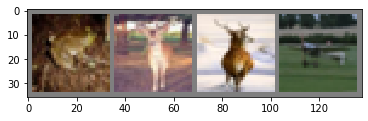

 frog  deer  deer plane


In [47]:
# view what we've got
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define a Convolutional Neural Net
- copy & modify previous net for using 3-channel images

In [48]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [49]:
# define loss function (cross-entropy loss) & optimizer (SGD with momentum)
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [50]:
# train the net

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data # data is a list of [inputs, labels]
        optimizer.zero_grad() # zero the parameter gradients
        outputs = net(inputs) # forward + backward + optimize
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Done Training')

170500096it [15:40, 184085.65it/s]                               

[1,  2000] loss: 2.066
[1,  4000] loss: 1.944
[1,  6000] loss: 1.952
[1,  8000] loss: 1.929
[1, 10000] loss: 1.948
[1, 12000] loss: 1.937
[2,  2000] loss: 1.946
[2,  4000] loss: 1.950
[2,  6000] loss: 1.986
[2,  8000] loss: 1.963
[2, 10000] loss: 1.942
[2, 12000] loss: 1.913
Done Training


In [51]:
# save trained model
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

[saving pytorch models = serialization](https://pytorch.org/docs/stable/notes/serialization.html)

In [52]:
!ls *.pth

cifar_net.pth


## Test network on test data
* trained net on training dataset (2 passes). did it learn?
* predict class labels from outputs -- compare to ground truth labels
* if prediction is correct -- add sample to list-of-correct-answers

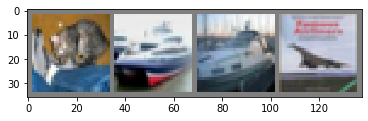

ground truth:   cat  ship  ship plane


In [53]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('ground truth:',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
# load saved model (not needed, but good for illustration)
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [55]:
# what have we got?
outputs = net(images)

In [56]:
# get index with highest "energy" (high energy = high confidence of a match.)
_, predicted = torch.max(outputs,1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   car  ship  ship


In [57]:
# how does net perform on entire dataset?
correct, total = 0,0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs        = net(images)
        _, predicted   = torch.max(outputs.data, 1)
        total         += labels.size(0)
        correct       += (predicted == labels).sum().item()

print('Accuracy on 10K test images: %d %%' % (
    100 * correct / total))


Accuracy on 10K test images: 25 %


In [58]:
# chance accuracy = 10% (1/10). What worked?

class_correct = list(0. for i in range(10))
class_total   = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs        = net(images)
        _, predicted   = torch.max(outputs, 1)
        c              = (predicted == labels).squeeze()
        
        for i in range(4):
            label                 = labels[i]
            class_correct[label] += c[i].item()
            class_total[label]   += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  7 %
Accuracy of   car : 56 %
Accuracy of  bird :  1 %
Accuracy of   cat :  7 %
Accuracy of  deer :  2 %
Accuracy of   dog : 25 %
Accuracy of  frog : 63 %
Accuracy of horse : 34 %
Accuracy of  ship : 34 %
Accuracy of truck : 23 %


## Training on GPUs (or CPUs)

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [60]:
# for cuda:
# net.to(device) # converts all params & buffers to CUDA tensors

In [61]:
# for cuda -- send inputs, targets at every step to CUDA
# inputs,labels = data[0].to(device), data[1].to(device)

## [Data Parallelism](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html)
- imports
- dummy dataset
- simple model
- create model & DataParallel
- run model
- results (2 gpus, 3 gpus, 8 gpus)
- summary